In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random

2023-06-07 18:03:44.227290: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [3]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [4]:
X_train.shape

(34799, 32, 32, 3)

In [5]:
y_train.shape

(34799,)

4

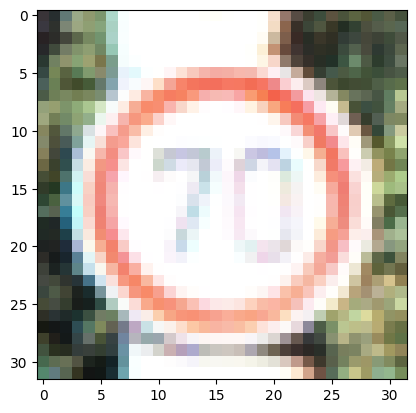

In [6]:
i = np.random.randint(1, len(X_train))
plt.imshow(X_train[i])
y_train[i]

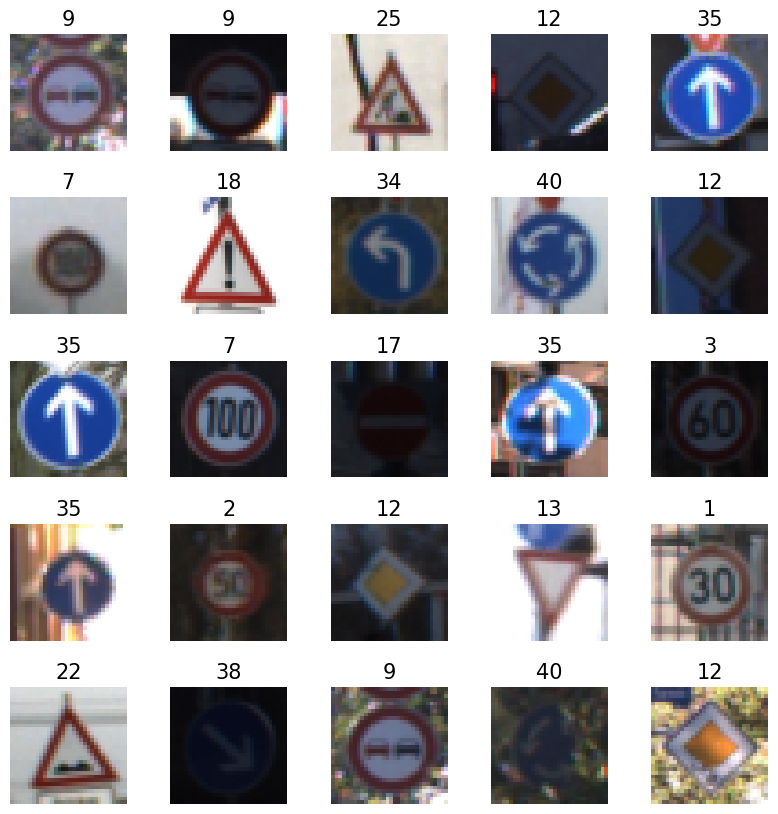

In [7]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 5
L_grid = 5

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))

axes = axes.ravel() # flaten the 5 x 5 matrix into 25 array

n_training = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training
# create evenly spaces variables 
for i in np.arange(0, W_grid*L_grid):
    # Select a random number
    index = np.random.randint(0, n_training)
    
    # read and display an image with the selected index    
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index], fontsize=15)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace=0.4)
    

In [8]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [9]:
# convert image into gray-scale 
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_test_gray = np.sum(X_test/3, axis=3, keepdims=True)
X_validation_gray = np.sum(X_validation/3, axis=3, keepdims=True)

In [10]:
X_train_gray.shape

(34799, 32, 32, 1)

In [11]:
# normalize images
X_train_gray_norm = (X_train_gray - 128)/128
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128
X_train_gray_norm

array([[[[-0.11197917],
         [-0.15885417],
         [-0.21614583],
         ...,
         [-0.49739583],
         [ 0.09635417],
         [ 0.234375  ]],

        [[-0.140625  ],
         [-0.125     ],
         [-0.04166667],
         ...,
         [-0.46875   ],
         [-0.00520833],
         [ 0.0625    ]],

        [[-0.25260417],
         [-0.14322917],
         [ 0.07291667],
         ...,
         [-0.25520833],
         [ 0.04947917],
         [-0.00520833]],

        ...,

        [[ 0.390625  ],
         [ 0.3203125 ],
         [ 0.40364583],
         ...,
         [-0.234375  ],
         [-0.203125  ],
         [-0.12760417]],

        [[ 0.37760417],
         [ 0.34375   ],
         [ 0.4453125 ],
         ...,
         [-0.26822917],
         [-0.19010417],
         [ 0.0546875 ]],

        [[ 0.34635417],
         [ 0.33072917],
         [ 0.45572917],
         ...,
         [-0.44270833],
         [-0.24479167],
         [ 0.11197917]]],


       [[[-0.72135417],


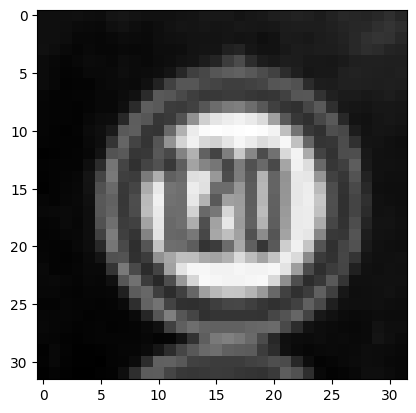

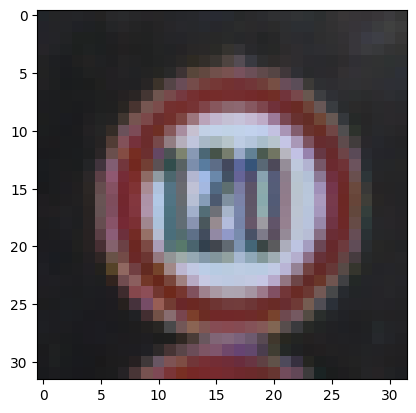

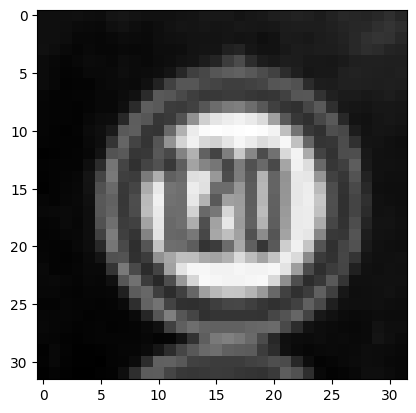

In [12]:
i = random.randint(1, len(X_train_gray))
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')

In [13]:
from tensorflow.keras import datasets, layers, models
CNN = models.Sequential()

CNN.add(layers.Conv2D(6, (5, 5), activation='relu', input_shape=(32,32,1)))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Dropout(0.2))

CNN.add(layers.Conv2D(16, (5, 5), activation='relu'))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Flatten())

CNN.add(layers.Dense(120, activation='relu'))
CNN.add(layers.Dense(84, activation='relu'))
CNN.add(layers.Dense(43, activation='softmax'))

CNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 dropout (Dropout)           (None, 14, 14, 6)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 400)               0

In [14]:
CNN.compile(optimizer='Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

history = CNN.fit(X_train_gray_norm,
                 y_train,
                 batch_size=500,
                 epochs=35,
                 verbose=1,
                 validation_data=(X_validation_gray_norm, y_validation))

Epoch 1/35
70/70 [==============================] - 5s 65ms/step - loss: 3.1839 - accuracy: 0.1858 - val_loss: 2.6213 - val_accuracy: 0.3127
Epoch 2/35
70/70 [==============================] - 4s 64ms/step - loss: 1.6709 - accuracy: 0.5401 - val_loss: 1.3518 - val_accuracy: 0.6098
Epoch 3/35
70/70 [==============================] - 4s 63ms/step - loss: 0.9717 - accuracy: 0.7206 - val_loss: 0.9852 - val_accuracy: 0.7186
Epoch 4/35
70/70 [==============================] - 4s 64ms/step - loss: 0.7413 - accuracy: 0.7884 - val_loss: 0.8040 - val_accuracy: 0.7646
Epoch 5/35
70/70 [==============================] - 4s 64ms/step - loss: 0.6134 - accuracy: 0.8237 - val_loss: 0.6966 - val_accuracy: 0.8104
Epoch 6/35
70/70 [==============================] - 5s 65ms/step - loss: 0.5214 - accuracy: 0.8533 - val_loss: 0.6589 - val_accuracy: 0.8186
Epoch 7/35
70/70 [==============================] - 5s 64ms/step - loss: 0.4602 - accuracy: 0.8683 - val_loss: 0.6151 - val_accuracy: 0.8336
Epoch 8/35
70

In [15]:
score = CNN.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

395/395 [==============================] - 1s 2ms/step - loss: 0.7000 - accuracy: 0.8919
Test Accuracy: 0.8919239640235901


In [16]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [17]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation loss')

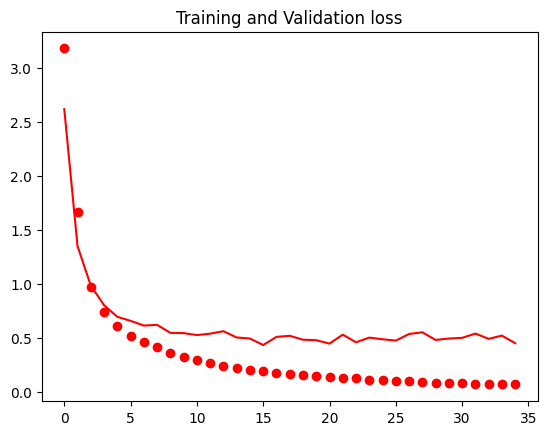

In [18]:
epochs = range(len(accuracy))
plt.plot(epochs, loss, 'ro', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and Validation loss')

Text(0.5, 1.0, 'Training and Validation loss')

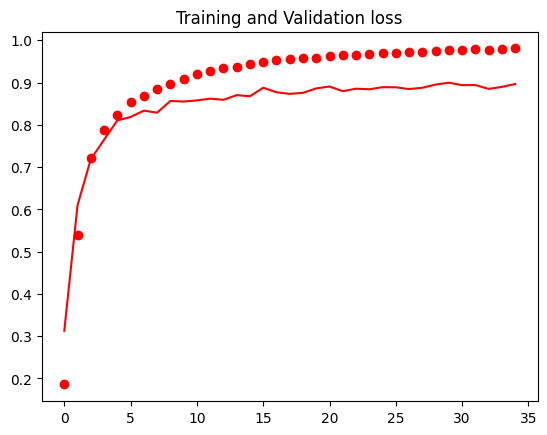

In [19]:
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'ro', label = 'Training loss')
plt.plot(epochs, val_accuracy, 'r', label = 'Validation loss')
plt.title('Training and Validation loss')

395/395 [==============================] - 1s 1ms/step


<Axes: >

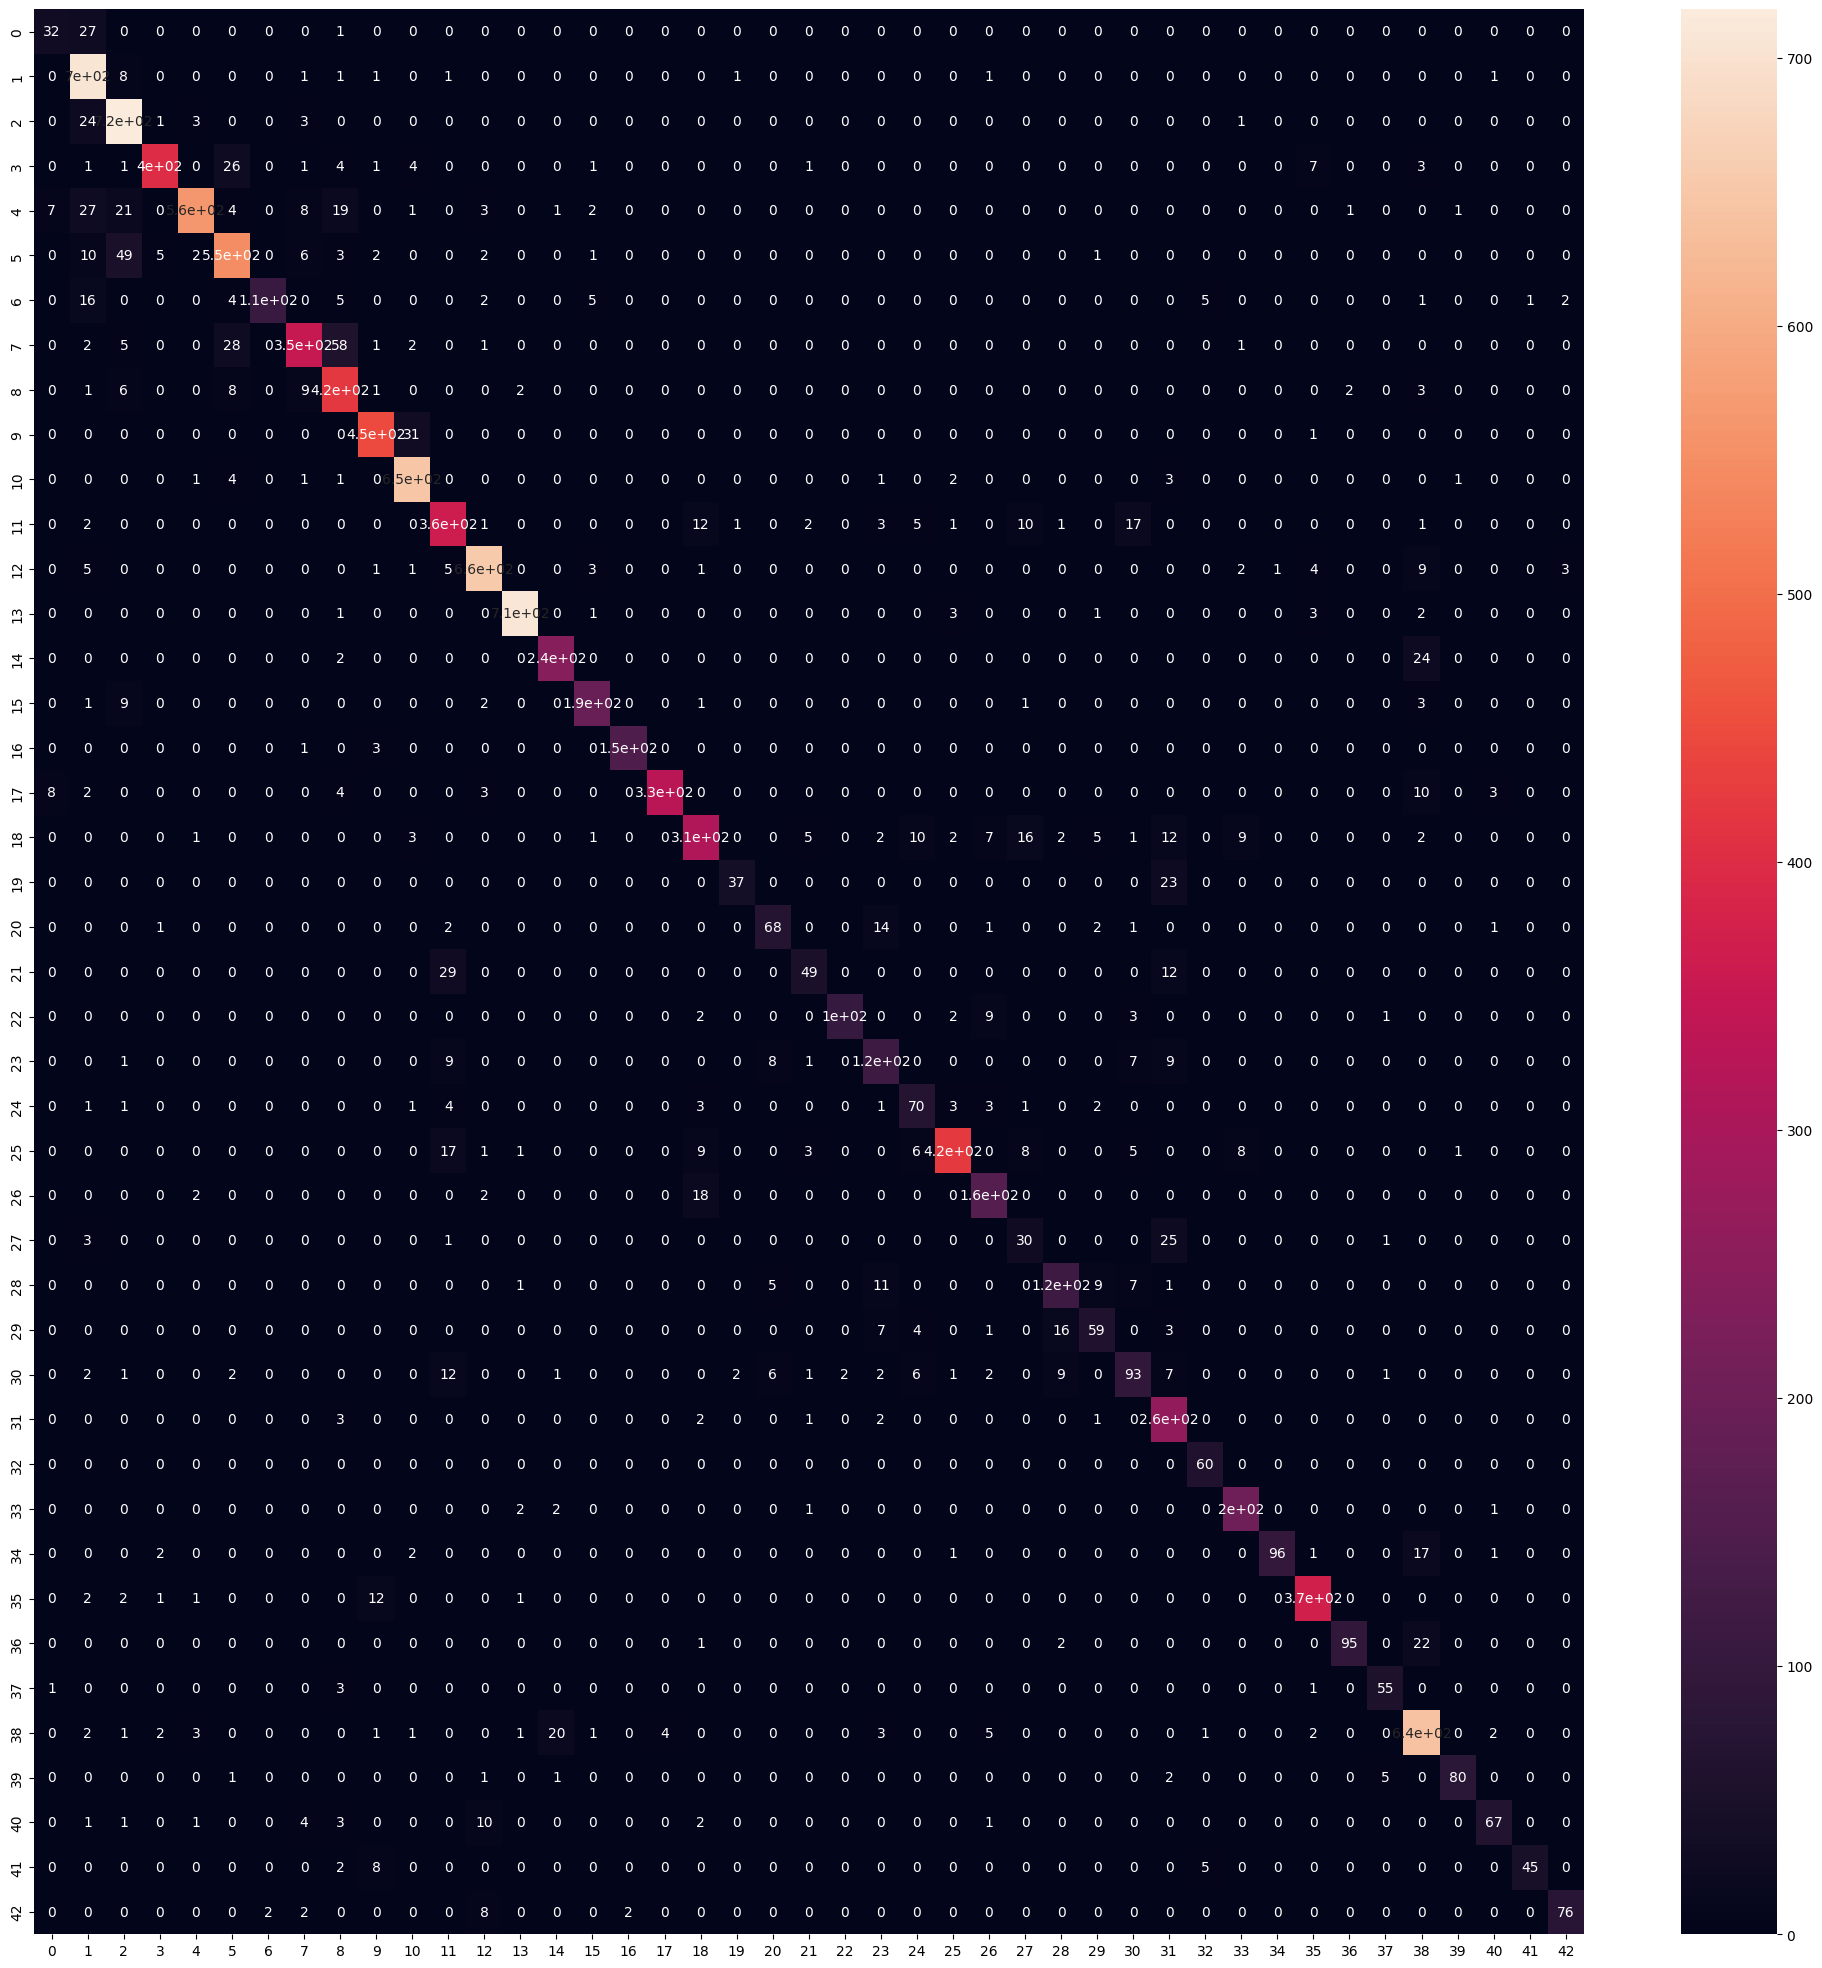

In [20]:
predict_x=CNN.predict(X_test_gray_norm)
predicted_classes = np.argmax(predict_x,axis=1)
y_true = y_test

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

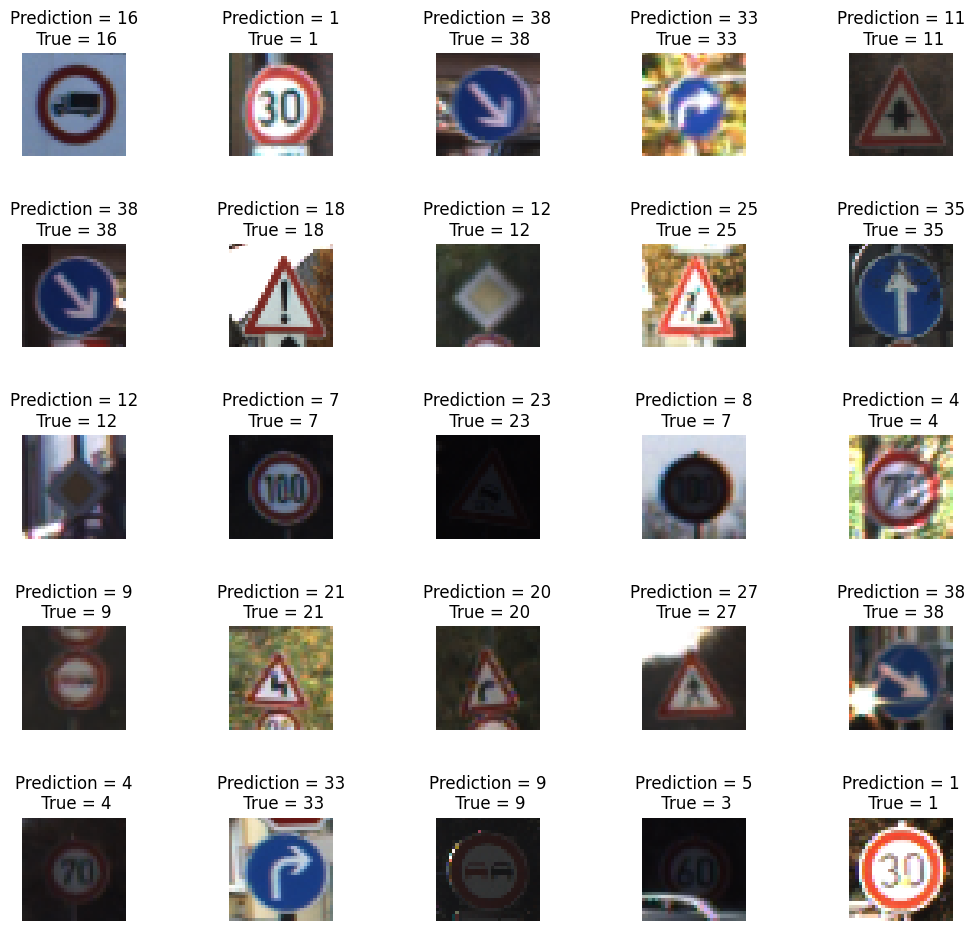

In [21]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)  